In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Program to show usage of statistical functions from SciPy library

In [2]:
from scipy import stats

In [3]:
mydata =[15,17,21,24,17,20,21,12,21,12,16,15,11]

### General statistics

In [4]:
stats.describe(mydata)

DescribeResult(nobs=13, minmax=(11, 24), mean=17.076923076923077, variance=16.74358974358974, skewness=0.0413054162308033, kurtosis=-1.128471725502979)

nobs = No of observations
### Cumulative Frequency

In [5]:
stats.cumfreq(mydata)

CumfreqResult(cumcount=array([ 1.,  3.,  3.,  6.,  8.,  8.,  9., 12., 12., 13.]), lowerlimit=10.277777777777779, binsize=1.4444444444444446, extrapoints=0)

### Geometric Mean

In [6]:
stats.gmean(mydata)

16.61014539547352

### Harmonic Mean

In [7]:
stats.hmean(mydata)

16.137442162785828

### Interquartile Range

In [8]:
stats.iqr(mydata)

6.0

### Z-score

In [9]:
stats.zscore(mydata)

array([-0.52829582, -0.01956651,  0.99789211,  1.76098608, -0.01956651,
        0.74352746,  0.99789211, -1.29138979,  0.99789211, -1.29138979,
       -0.27393117, -0.52829582, -1.54575445])

### Standard Error of the Mean

In [10]:
stats.sem(mydata)

1.1348869731451656

### Rank
ranking refers to data transformation in which the numerical values are replaced by their ranks

In [11]:
mydata2 = [15,17,11,14,17,20,13,12,13,12,16,17]
stats.rankdata(mydata2)

array([ 7. , 10. ,  1. ,  6. , 10. , 12. ,  4.5,  2.5,  4.5,  2.5,  8. ,
       10. ])

Here wherever there is a tie the rank is calculated and replaced by their average

### Determining Normality

a. By applying skewness and Kurtosis

b. Applying normal test function

c. Shapiro Test

In [12]:
mydata3 = [125,127,121,132,127,120,134,126,135,129,126,127,126,123,122,121,127,126,123,125]

### Using skewness and Kurtosis Functions for determining normality


In [13]:
print(stats.skew(mydata3))
print(stats.kurtosis(mydata3))

0.643279161557402
-0.059619587516806405


If the value of skewness and Kurtosis is between -1 and +1, we consider the data to be normal. In this case the values are between -1 and +1

### Using normaltest() function


In [14]:
stats.normaltest(mydata3)

NormaltestResult(statistic=2.222167732125128, pvalue=0.3292019568090198)

p-value is insignificant so the data is normal

### Using shapiro() function


In [15]:
stats.shapiro(mydata3)

ShapiroResult(statistic=0.9267992973327637, pvalue=0.13397882878780365)

p-value is insignificant so the data is normal

## Homogeneity of Variances
We use Brtlett's test or Levene Test to check that. If p value is more than 0.05, the assumption of homogenity of variance is met. It means that there is a homogeniety of variances in the two groups

In [16]:
mydata4 = [15,19,12,14,17,17,21,23,11,19,18,11,13,18]
mydata5 = [11,14,17,19,13,22,27,28,16,18,11,14,18,18]
# Bartlett test
print(stats.bartlett(mydata4,mydata5))
print(stats.levene(mydata4,mydata5))

BartlettResult(statistic=1.40217443015265, pvalue=0.23635983922962633)
LeveneResult(statistic=0.6391259815636738, pvalue=0.4312710035181735)


## Correlation Coefficient

### Determining Spearman correlation coefficient
Null Hypothesis: There is no correlation between two groups


In [17]:
stats.spearmanr(mydata4,mydata5)

SignificanceResult(statistic=0.3633342304559976, pvalue=0.201633766201691)

p value means that there is no significant correlation between the groups

### Determining Pearson correlation coefficient
Null Hypothesis: There is no correlation between two groups


In [18]:
stats.pearsonr(mydata4,mydata5)

PearsonRResult(statistic=0.5076714611348472, pvalue=0.06385187280931964)

p value means that there is no significant correlation between the groups

### Chi-Square Test
It is a statistical method to dertermine if two variables in a table have a significant correlation between them. 
#### Null Hypothesis: The two groups are independent


In [19]:
# to apply this the sum of mydata4 and mydata5 must be same. Lets check that
sum_mydata4 =sum(mydata4)
sum_mydata5 = sum(mydata5)
print(sum(mydata4))
print(sum(mydata5))

228
246


In [20]:
# the sums are different. We can normalize the mydata5 so that it matches with 228
# Normalizing mydata5 to match the sum of mydata4
normalized_mydata5 = [round(value * sum_mydata4 / sum_mydata5) for value in mydata5]

# Verifying the sum of the normalized data
sum_normalized_mydata5 = sum(normalized_mydata5)

# Adjusting one of the values in normalized_mydata5 to ensure the sums match exactly
difference = sum_mydata4 - sum_normalized_mydata5
normalized_mydata5[-1] += difference  # Adjusting the last value of the list

# Verifying the sum of the adjusted data
sum_normalized_mydata5_adjusted = sum(normalized_mydata5)

stats.chisquare(mydata4,normalized_mydata5)

Power_divergenceResult(statistic=19.878436400201107, pvalue=0.09828314835390596)

p-value is more than 0.05, so the two groups are independent

### Parameteric Techniques for comparing means
t-test: for 2 samples
ANOVA: for more than two samples

Three assumptions to be fulfilled before applying t-test or ANOVA
a. Normally distributed
b. Independent Samples
c .Homogenity of Variances

While comparing Means of differnt groups we frame hypothesis in which the dependent variable is continuous and independent variable is categorical in nature. eg. in determining the effect of gender on job satisfaction, gender(categorical variable) will be considered as indendent variable and job satisfaction will be considered as dependent variable

In [21]:
mtcars = pd.read_csv('mtcars.csv',sep=',',na_values=".")
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [22]:
mtcars.shape

(32, 12)

In [23]:
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

### One Sample t-test

This test compares the sample mean of one group with a standard value. Since only one sample is involved, hence for this test there is a need to fulfil only the normality assumption

syntax: stats.ttest_1samp(sample,val)

Sample is the continuous variable diplaying the set of observations
val represents the value which we want to compare the sample mean

#### One sample test on User's Data

Example, the pharmaceutical company desired that to check the whether the report of the cheimical deviate from the standard varlue of 3. Bsed on 30 different observations generated, we will check whether or not the chemical devaiates significantly from the expected value of 3. But before we apply one-sample t-test, it is necessary to fulfil the assumption of normality. 

Sample Size: 30
Skewness: 0.6131524814522338
Kurtosis: -0.6495231070672487
Normality Function: p value >0.05 for normality: NormaltestResult(statistic=2.735896790927154, pvalue=0.2546288216880709)


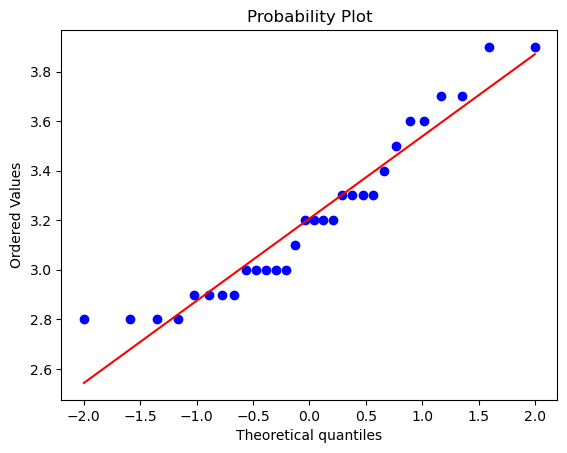

In [24]:
# Creating a sample
report = np.array([3.7,3.6,3.9,3.2,3.6,3.0,3.0,2.8,2.8,2.9,2.9,3.2,3.3,3.4,3.3,3.2,3.9,3.2,3.0,3.7,
                  2.9,3.0,3.5,3.3,3.3,2.8,3.0,3.1,2.9,2.8])
print('Sample Size:',len(report))
# checking Normality
print("Skewness:",stats.skew(report))
print("Kurtosis:",stats.kurtosis(report))
print("Normality Function: p value >0.05 for normality:",stats.mstats.normaltest(report))
# plotting probability plot
stats.probplot(report,fit=True,plot=plt)
plt.show()

Data is Normal

In [25]:
# applying 1 sample test
# Null hypothesis: No significant difference in the report and value 3
stats.ttest_1samp(report,3)

TtestResult(statistic=3.4190666531267673, pvalue=0.0018844344706902736, df=29)

There is a significant difference

### Applying t-test on existing data mtcars

We consider the "disp" variable which corresponds to the displacement in mtcars dataset. We think the displacement is 160

Skewness (-1 to +1 for Normal): 0.40027244847286664
Kurtosis: (-1 to +1 for Normal) -1.0896826570135087
Normality Function: p value >0.05 for normality: NormaltestResult(statistic=5.000392776591721, pvalue=0.08206887967374173)


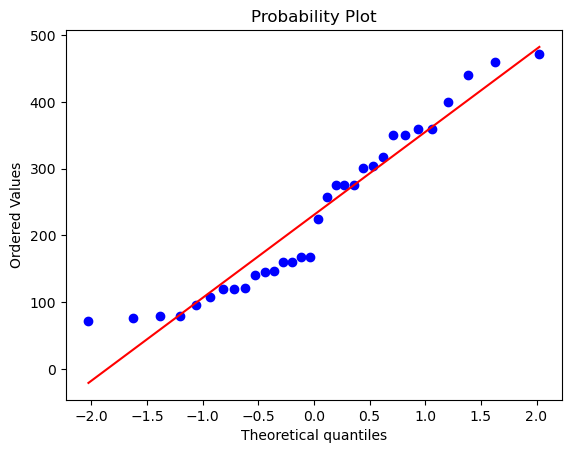

In [26]:
# checking Normality
print("Skewness (-1 to +1 for Normal):",stats.skew(mtcars["disp"]))
print("Kurtosis: (-1 to +1 for Normal)",stats.kurtosis(mtcars["disp"]))
print("Normality Function: p value >0.05 for normality:",stats.mstats.normaltest(mtcars["disp"]))
# plotting probability plot
stats.probplot(mtcars["disp"],fit=True,plot=plt)
plt.show()

Data Seems Normal

In [27]:
# applying 1 sample test
# Null hypothesis: No significant difference in the report and value 160
stats.ttest_1samp(mtcars["disp"],160)

TtestResult(statistic=3.2279131460761015, pvalue=0.0029430502062477958, df=31)

P value is less than 0.05, so there is a significant difference

### Independent Sample t-test
The t-test helps in comparing the population means of only two groups, and hus helps in examining whether the population means of two samples greatly differ from each another. 

Syntex: stats.ttest_ind(sample_a,sample_b,equal_var=)

sample_a and sample_b are two independent samples
equal_var has a Boolean value representing the variance for the two groups. Default value is True

#### Applying t-test on User's Data

We create our own dataset for perception related to online shopping for young and old groups and apply independent sample t-test on both the groups after checking the assumptions

In [28]:
# Storing the perception of two groups senior and junior
senior = [192,187,195,194,191,193,195,187,188,191,192,197,191,187,195,186,188,191,192,197,
         193,190,191,194,193]
junior = [101,107,98,99,104,99,106,105,101,105,103,96,95,104,91,106,103,104,101,103,99,99,104,
         99,106,101,106,102,103,104]

print("size-Senior:",len(senior))
print("size-junior:",len(junior))

size-Senior: 25
size-junior: 30


skew: Senior(Between 1 and -1 for normality): -0.1340504464760123
Kurtosis:Senior(Between 1 and -1 for normality): -0.8233266302786566
skew: Junior(Between 1 and -1 for normality): -0.9374069158238724
Kurtosis:Junior(Between 1 and -1 for normality): 0.6796048621320185


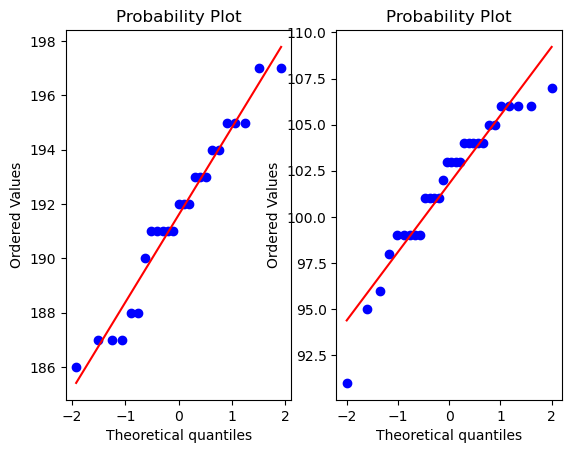

Levene test: p value to be >0.05 for Homogenity LeveneResult(statistic=0.38087140794162133, pvalue=0.5397796466241933)
Bartlett test: p value to be >0.05 for Homogenity BartlettResult(statistic=0.7351344117107318, pvalue=0.3912239715112361)


In [29]:
# Determining Normality of the data
print("skew: Senior(Between 1 and -1 for normality):",stats.skew(senior))
print("Kurtosis:Senior(Between 1 and -1 for normality):",stats.kurtosis(senior))
print("skew: Junior(Between 1 and -1 for normality):",stats.skew(junior))
print("Kurtosis:Junior(Between 1 and -1 for normality):",stats.kurtosis(junior))

# Dispalying the normality graphically
plt.subplot(121) # graph in the 1st quadrant
stats.probplot(senior,fit=True,plot=plt)
plt.subplot(122) # graph in the 2nd quadrant
stats.probplot(junior,fit=True,plot=plt)
plt.show()

# Determine the Homogenity of variances for both the samples
print("Levene test: p value to be >0.05 for Homogenity",stats.levene(senior,junior))
print("Bartlett test: p value to be >0.05 for Homogenity",stats.bartlett(senior,junior))

Data seems normal

In [30]:
## t-test for independent samples
stats.ttest_ind(senior,junior)

Ttest_indResult(statistic=95.66697264518015, pvalue=4.8465172344723005e-61)

As the p value is less than 0.05 so null hypothesis is rejected. So there is a true difference in the means. So it means that there is a significant difference in the perception of senior and junior groups. 
### Independent sample test on an existing dataset
In this example we first take "mpg" check for normality then split it into two parts v shape and straight shape and test for homogenity in the two groups and apply independent sample test for difference in mpg given these shapes

Skewness (-1 to +1 for Normal): 0.6404398640318834
Kurtosis: (-1 to +1 for Normal) -0.20053320971549793
Normality Function: p value >0.05 for normality: NormaltestResult(statistic=2.714135080337956, pvalue=0.25741452900583284)


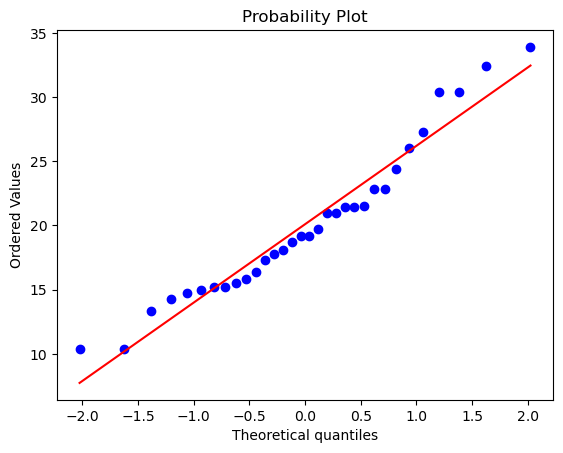

In [31]:
# checking Normality
print("Skewness (-1 to +1 for Normal):",stats.skew(mtcars["mpg"]))
print("Kurtosis: (-1 to +1 for Normal)",stats.kurtosis(mtcars["mpg"]))
print("Normality Function: p value >0.05 for normality:",stats.mstats.normaltest(mtcars["mpg"]))
# plotting probability plot
stats.probplot(mtcars["mpg"],fit=True,plot=plt)
plt.show()

Data Seems Normal

In [32]:
# Creating two groups for vshape and straight
vshape_mpg = mtcars[mtcars['vs']==0]['mpg']
straight_mpg = mtcars[mtcars['vs']==1]['mpg']

# Determining homogenity of variances
print("Levene test: p value to be >0.05 for Homogenity",stats.levene(vshape_mpg,straight_mpg))
print("Bartlett test: p value to be >0.05 for Homogenity",stats.bartlett(vshape_mpg,straight_mpg))

Levene test: p value to be >0.05 for Homogenity LeveneResult(statistic=1.5922160724616752, pvalue=0.21673257532557122)
Bartlett test: p value to be >0.05 for Homogenity BartlettResult(statistic=1.5848658640382187, pvalue=0.20806119496717373)


Variances seems to homogeneous in both the samples

In [33]:
# applying ttest of independent samples
# Null Hypothesis: There is no significant difference between the two shapes
stats.ttest_ind(vshape_mpg,straight_mpg)

Ttest_indResult(statistic=-4.864384956122782, pvalue=3.415937254419951e-05)


There is a significant difference between the two shapes, looking at the p value

### Homogeneity of Variance- Condition Not fulfilled

Whether there is  a significant difference between automatic and manual transmission wrt mpg. Here mpg is a continuous variable and hence considered as dependent variable

In [34]:
# program for t-test when homogenity assumption is not fulfilled
from scipy import stats
mtcars = pd.read_csv('mtcars.csv',sep=',',na_values=".")

In [35]:
# Creating Datasets for transmission related to mpg
auto_mpg = mtcars[mtcars['am']==0]['mpg']
manual_mpg = mtcars[mtcars['am']==1]['mpg']

In [36]:
# displaying the mens of two groups
print(f"Mean of automatic transmission group: {auto_mpg.mean()}")
print(f"Mean of manual transmission group: {manual_mpg.mean()}")

Mean of automatic transmission group: 17.147368421052633
Mean of manual transmission group: 24.39230769230769


In [37]:
# Determine the Homogenity of variances for both the samples
print("Levene test: p value to be >0.05 for Homogenity",stats.levene(auto_mpg,manual_mpg))
print("Bartlett test: p value to be >0.05 for Homogenity",stats.bartlett(auto_mpg,manual_mpg))

Levene test: p value to be >0.05 for Homogenity LeveneResult(statistic=4.1876255537753995, pvalue=0.04957067404156203)
Bartlett test: p value to be >0.05 for Homogenity BartlettResult(statistic=3.2258823148923645, pvalue=0.07248272665325972)


The homogenity of variance is not met as compared to Levene test, which is morr reliable
Applying independent Sample t-test with unequal variances
#### Null Hypthesis: There is no significant difference between automatic and manual


In [38]:
print("Result: ",stats.ttest_ind(auto_mpg,manual_mpg,equal_var=False))

Result:  Ttest_indResult(statistic=-3.767123145144923, pvalue=0.0013736383330710345)


So there is a signficant difference

## Dependent t-Test

Paired t-test is used for dependent samples.If we collect two measuremnts on each item, person or experimental unit, then each pair of observation is closely related or matched.In this type of scenario, we apply a paired-t test. 

Syntax: 
stats.ttest_rel(sample_a,sample_b)
where sample_a and sample_b are two dependent samples

In the following example, we need to determine the effect of treatment on patients. This leads to a set of paired observations(scores before and after each treatment) for each patient

In [39]:
# Create two arrays pretreat and posttreat
pretreat = [287,277,252,245,265,287,242,250,252,258,259,212,213,205,207]
posttreat = [286,277,251,246,266,288,242,252,256,253,257,212,216,206,208]

In [40]:
# Applying paired t-test for parameteric data.
# Null hypothesis: There is no sifnificant difference between the two scores (before and after treatment)

print("Result of test is: \n",stats.ttest_rel(pretreat,posttreat))

Result of test is: 
 TtestResult(statistic=-0.606976978666884, pvalue=0.5535832579206403, df=14)


Failed to reject the null hypothesis- No significant difference between the two treatments

## One Way ANOVA

One way ANOVA is used when a comparison is to be made between more than two populations means. 

In ANOVA the total amount of variation in a dataset is split into two types, that is, the amount allocated to chance and the amount assigned to particular causes.

Its basis principle is to test the variances among population means by assessing the amount of variation within group items, proportionate to the amount of variation between groups.

With the use of this technnique, we test null hypothesis(H0) wherein all population means are the same, or alternative hypothesis(H1) wherein at least one population mean is different

### Applying ANOVA test on the user's data

In [41]:
# Perception of people belonging to three different income groups.
low = [4.0,4.5,5.0,4.9,4.1,3.5,3.7,2.1,2.7,3.2,2.4,3.6,3.6,3,3.1,3.5]
middle = [4.0,4.5,5.0,4.9,3.2,2.4,3.6,3.6,3.0,3.1,3.5,3.2,3.7,3.8,3.5]
High = [3.7,2.1,2.7,3.2,2.4,3.6,3.6,3.0,3.1,3.5,3.2,3.7,3.8,3.5,3.6,3.8]
[len(x) for x in[low,middle,High]]

[16, 15, 16]

In [42]:
# Determining the Normality of the data
[stats.skew(x) for x in [low,middle,High]]

[0.11808551658763525, 0.4483461182549051, -1.0363243782008256]

Normal data -1 to +1. The data seems to be normal

In [43]:
# Determining the Normality of the data
[stats.kurtosis(x) for x in [low,middle,High]]

[-0.5873383735027673, -0.2578882607340418, 0.026932843360271796]

Kurtosis for Normal data should be -1 to +1. The data seems to be normal

In [44]:
# Applying one way ANOVA
stats.f_oneway(low,middle,High)

F_onewayResult(statistic=1.287903238368855, pvalue=0.2860424199410573)

p-value is more than 0.05, so failed to reject the null hypothesis, there is no significant difference between two different income groups

An ANOVA test can give result saying that some of the group means are different. But we do not know which pairs of groups are different.

It is possible to perform multiple pairwise comparisons. 

We can apply Tukey HSD ( TukeyHonest Significant Differences) for performaing multiple pairwise comparisons between the means of groups from the statsmodel.stats package

Syntax: pairwise_tukeyhsd(endog=,groups=,alpha=)

endog- has the continous dependent variable

groups has the categorical independent variable

alpha represent desired level of significance

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Applying ANOVA test on Horse Power according to the number of cylinders

Four_hp = mtcars[mtcars['cyl']==4]['hp']
Six_hp  = mtcars[mtcars['cyl']==6]['hp']
Eight_hp = mtcars[mtcars['cyl']==8]['hp']

stats.f_oneway(Four_hp,Six_hp,Eight_hp)

F_onewayResult(statistic=36.17687319884725, pvalue=1.3185414187614477e-08)

As p value is less than 0.05, so there is a significant difference in the milage with  different horse power

In [46]:
# Applying TUKEY test on Horse Power According to the number of cylinders
tukey = pairwise_tukeyhsd(endog=mtcars['hp'],groups=mtcars['cyl'],alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
4,6,39.6494,0.0949,-5.6275,84.9262,False
4,8,126.5779,0.0,88.8473,164.3086,True
6,8,86.9286,0.0001,43.5793,130.2778,True


So there is no significance difference in the horse power between 4 and 6 cylinders

# Non Parameteric Techniques for Comparing Means

If the data is not normal, then non parametric techniques are generally used for comparing the means. However, non-parameteric techniques are considered to be less effective in comparison to parameteric Techniques.

## Komogorov-Smirnov Test: Comparing the two distributionsTest for one sample

Syntax: ks.scipy.stats.kstest(a,dist) where

a is the distribution

dist indicates the name of the distribution

### Applying KS Test on user's data

In [47]:
data = [312,313,315,316,311,312,313,319,317,315,320,320,312]
len(data)

13

In [48]:
# Null Hypothesis: the two distributions are identical
stats.kstest(data,'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=311, statistic_sign=-1)

p value is less than 0.5 so the two distributions are not Identical, which means the distribution given is not normal

### Applying KS Test on existing dataset

In [49]:
stats.kstest(mtcars["mpg"],'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=10.4, statistic_sign=-1)

p value is less than 0.5 so the two distributions are not Identical, which means the distribution given is not normal

## Komogorov-Smirnov Test: Comparing the two distributions Test for Two sample

Syntax: ks.scipy.stats.ks_2samp(a,b)

where a and b are two distributions

### Applying KS Test on user's data- Two Sample

In [50]:
# We want to see if there is a significant difference between the perception of yound and old people

young= [511,512,513,514,511,515,512,514,515,513]
old=[504,507,519,511,502,510,508,417,513,512]

# Null Hypothesis: There is no significant difference between two samples

stats.ks_2samp(young,old)

KstestResult(statistic=0.6, pvalue=0.05244755244755244, statistic_location=510, statistic_sign=-1)

p-value is less than 0.05, so there is a significant difference in the perception

### Applying KS Test on existing Dataset- Two Sample

In [51]:
# We want to know whether the type of transmission affects the value of disp variable or not

auto_disp=mtcars[mtcars['am']==0]['disp']
manual_disp=mtcars[mtcars['am']==1]['disp']

# There is no difference in the diplacement of Auto or manual transmission

stats.ks_2samp(auto_disp,manual_disp)

KstestResult(statistic=0.6882591093117408, pvalue=0.0005273572890973868, statistic_location=160.0, statistic_sign=-1)

As p value is less than 0.05, so there is a significant difference in the displacment for the two types of transmissions

## Mann-Whitney Test for Indpendent Samples

Two data samples are independent if they come from distinct populations and the samples do not affect each other. Using the Mann Whitney test, we can decide whether the population distributions are identical without assuming them to follow normal distributions

In [52]:
# Perception of two samples male and female

male = [721,725,728,729,731,738,742,735,741]
female=[722,712,713,715,718,719,721,722,724,718,719,716,723,727]

# Null: There is no significant difference between two samples
stats.mannwhitneyu(male,female)

MannwhitneyuResult(statistic=119.5, pvalue=0.0004137422883783115)

As p value is less than 0.05.There is a significance difference in the perception of males and females.

In [53]:
# MW test on existing dataset

# Here we consider 'drat' indicating rear axle ratio of mtcars along with another data column named "am". Want to chek if the 
# distribution of 'drat' is identical for both the transmission

auto_drat = mtcars[mtcars['am']==0]['drat']
manual_drat = mtcars[mtcars['am']==1]['drat']

stats.mannwhitneyu(auto_drat,manual_drat)

MannwhitneyuResult(statistic=24.0, pvalue=0.000142691919565049)

p=value is less than 0.05 indicating that these two samples are NOT coming from identical populations

## Wilcxon Test for Dependent Samples

It is used to compare dependent samples ( before and after).It is important to understand that the number of observations remain the same in both the dependent samples,

syntax:
wilcoxon(a,b)

Where a and b are two dependent data samples

We want to check whether there was any differece after the training was conducted for employees inn the organization. The data is considered to be not normal. 

In [54]:
# Two dependent samples related to before and after training
pretrg = [19,18,15,13,16,11,15,13,14,17,15,12,14,15,13]
posttrg = [18,17,16,13,16,14,17,19,15,12,10,18,17,13,12]
# Null Hypothesis: No significant difference
stats.wilcoxon(pretrg,posttrg)

C:\Users\asus\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=36.5, pvalue=0.5263223114789696)

As the p value is more than 0.05, so there is no significant difference between pre and post.

## Kusksal Test for Dependent Samples

This is a non-parametric alternative to one-way ANOVA test, which is used when assumptions are not met.

Syntax

kurskalwallis(GroupA,GroupB...GroupN)
wherer GroupA, GroupB,...are different groups


In [55]:
# Creating three different groups.Checking perception in these three groups
grad=[851,853,858,749,743,848,842,745,741,765,798,801,832,809]
postgrad=[842,945,943,945,938,939,921,922,924,828,929,836,923,827]
doubpostgrad=[929,921,924,927,928,929,926,925,927,936,987,964]

# Null Hypothesis: There is no significance between these three groups

stats.mstats.kruskalwallis(grad,postgrad,doubpostgrad)

KruskalResult(statistic=21.885637834140322, pvalue=1.7684554666122655e-05)

p-value is less than 0.05, so there is a significant difference

In [56]:
# is mpg is different for 3 different types of gears

Three_mpg = mtcars[mtcars['gear']==3]['mpg']
Four_mpg = mtcars[mtcars['gear']==4]['mpg']
Five_mpg = mtcars[mtcars['gear']==5]['mpg']

[type(x) for x in [Three_mpg,Four_mpg,Five_mpg]]

# Converting the series types to list

Three_lst = list(Three_mpg)
Four_lst = list(Four_mpg)
Five_lst = list(Five_mpg)

# Applying Kruskal-Wallis Test on three groups
# Null Hypothesis: There is no sifnificant differnce between three groups
stats.mstats.kruskalwallis(Three_lst,Four_lst,Five_lst)

KruskalResult(statistic=14.323348320792807, pvalue=0.0007757547276206059)

p value is less than 0.05, so mpg of cars having different gears is different